# This notebook contains cross validation experimentation for the San Rafeal river system dataset.

### Needed Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Setting up the style to make the plots look good.
plt.style.use('fivethirtyeight')

# Disabling the deprecation warnings because life is good. 
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

### Removing Outliers
We did the data collition by hand so we are removing any datapoints that are obviously mis recordings

In [35]:
san_raf = pd.read`_csv('datasets/s1=09328910_2000,s2=093285002015start-2016_dd_20180410-211609.csv')

In [105]:
no_outliers = san_raf[san_raf.secs_elapsed.between(40000, 300000)]
x_range = np.arange(0, np.ceil(no_outliers.free_discharge.max()))

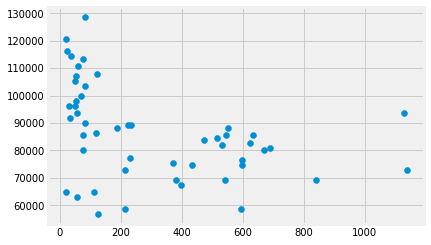

In [106]:
plt.scatter(no_outliers.free_discharge.values, no_outliers.secs_elapsed.values)

### Seperating X and Y values.

In [61]:
Y = np.log(no_outliers.secs_elapsed.values)
X = np.log(no_outliers.free_discharge.values)

In [80]:
x_range = np.arange(X.min(), np.ceil(X.max()))

#### Plot of the log scale values.
This transform the data to a more linear progression

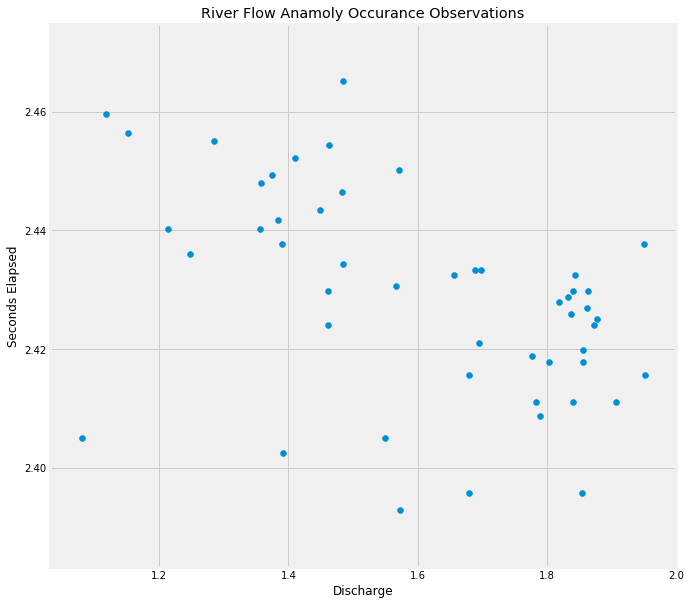

In [81]:
plt.figure(figsize=(10, 10))
plt.scatter(np.log(X), np.log(Y))
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.show()

### Running Cross k-Fold Cross Validation to find the best parameters for Linear Regression Models
Using skleanrs pipelines, and gridsearch for easy and simple cross validation

In [82]:
# Function to use to evaluate the score of the model
def score_func(estimator, X, y):
    return -1*np.linalg.norm(estimator.predict(X) - y, 2)

In [83]:
# Setting up pipeline so data is fed into the polynomial features before going into the regression.
lin_reg_pip = Pipeline([('regressor', LinearRegression())])

# Running the Cross Validation to search over the parameter space.
lin_reg_clf = GridSearchCV(lin_reg_pip,  {}, 
                           scoring=score_func, 
                           cv=KFold(n_splits=5, shuffle=True, random_state=45), )
lin_reg_results = lin_reg_clf.fit(X[:, np.newaxis], Y[:, np.newaxis])
lin_reg_results.grid_scores_

[mean: -0.55680, std: 0.13377, params: {}]

### Presenting the best estimator

In [84]:
lin_reg_results.best_estimator_

Pipeline(memory=None,
     steps=[('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### Plotting the linear model

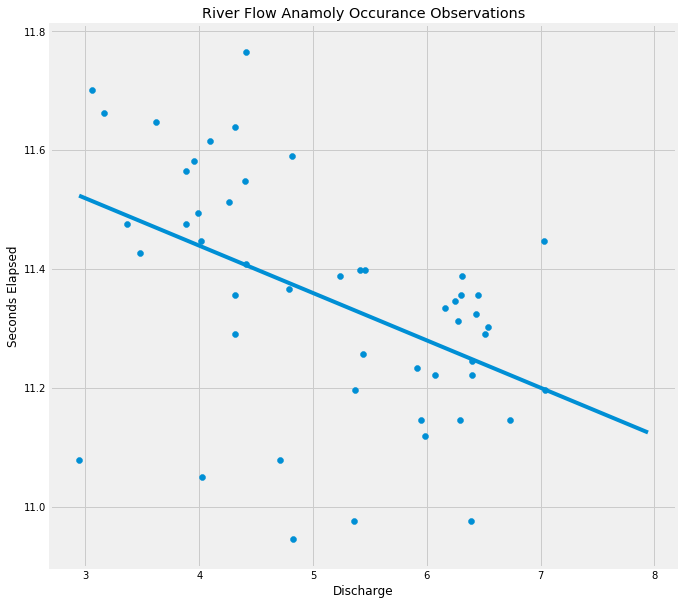

In [85]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, lin_reg_results.best_estimator_.predict(x_range[:,np.newaxis]))
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.show()

# Running Cross k-Fold Cross Validation to find the best parameters for Ridge Regression Models

In [88]:
ridge_reg_pip = Pipeline([('regressor', Ridge())])
ridge_reg_clf = GridSearchCV(ridge_reg_pip, {'regressor__alpha': [.0001, .001, .01, .1, 1, 10, 100]},
                             scoring=score_func, 
                             cv=KFold(n_splits=5, shuffle=True, random_state=45))
ridge_reg_results = ridge_reg_clf.fit(X[:, np.newaxis], Y[:, np.newaxis])
ridge_reg_results.grid_scores_

[mean: -0.55680, std: 0.13377, params: {'regressor__alpha': 0.0001},
 mean: -0.55680, std: 0.13377, params: {'regressor__alpha': 0.001},
 mean: -0.55680, std: 0.13376, params: {'regressor__alpha': 0.01},
 mean: -0.55678, std: 0.13366, params: {'regressor__alpha': 0.1},
 mean: -0.55661, std: 0.13269, params: {'regressor__alpha': 1},
 mean: -0.55715, std: 0.12510, params: {'regressor__alpha': 10},
 mean: -0.58630, std: 0.10462, params: {'regressor__alpha': 100}]

#### Presenting the best ridge estimator

In [89]:
ridge_reg_results.best_estimator_

Pipeline(memory=None,
     steps=[('regressor', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

### Plotting the ridge model

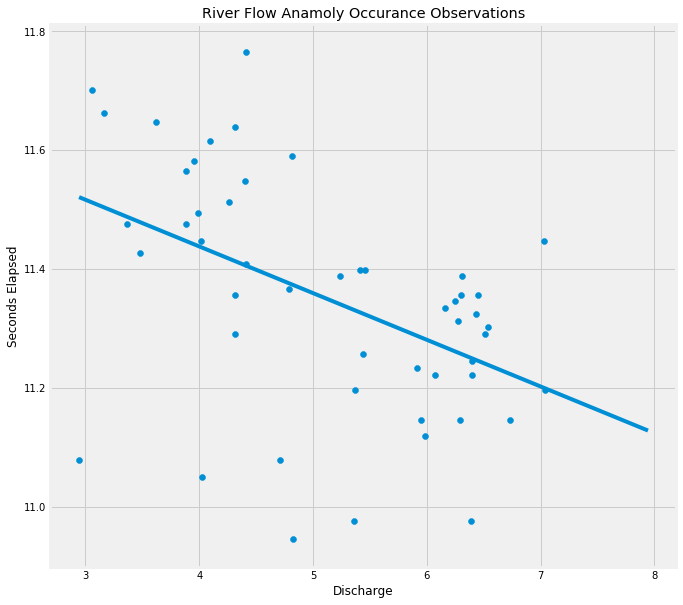

In [90]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, ridge_reg_results.best_estimator_.predict(x_range[:,np.newaxis]))
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.show()

# Running Cross k-Fold Cross Validation to find the best parameters for Lasso Regression Models 

In [95]:
lasso_reg_pip = Pipeline([('regressor', Lasso())])
lassor_reg_clf = GridSearchCV(lasso_reg_pip,  {'regressor__alpha': [.0001, .001, .01, .1, 1, 10, 100, 1000]},
                              scoring=score_func, 
                              cv=KFold(n_splits=5, shuffle=True, random_state=45))
lasso_reg_results = lassor_reg_clf.fit(X[:, np.newaxis], Y[:, np.newaxis])
lasso_reg_results.grid_scores_

[mean: -2.00019, std: 0.31766, params: {'regressor__alpha': 0.0001},
 mean: -1.99930, std: 0.31758, params: {'regressor__alpha': 0.001},
 mean: -1.99135, std: 0.31675, params: {'regressor__alpha': 0.01},
 mean: -1.98486, std: 0.29852, params: {'regressor__alpha': 0.1},
 mean: -1.99138, std: 0.29671, params: {'regressor__alpha': 1},
 mean: -1.99138, std: 0.29671, params: {'regressor__alpha': 10},
 mean: -1.99138, std: 0.29671, params: {'regressor__alpha': 100},
 mean: -1.99138, std: 0.29671, params: {'regressor__alpha': 1000}]

### Presenting the best ridge model

In [96]:
lasso_reg_results.best_estimator_

Pipeline(memory=None,
     steps=[('regressor', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

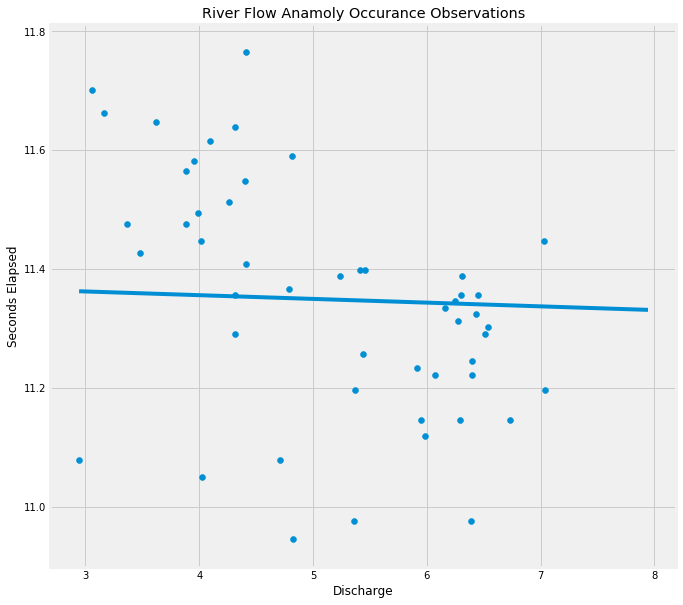

In [97]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, lasso_reg_results.best_estimator_.predict(x_range[:,np.newaxis]))
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.show()

## Plotting all the best models.

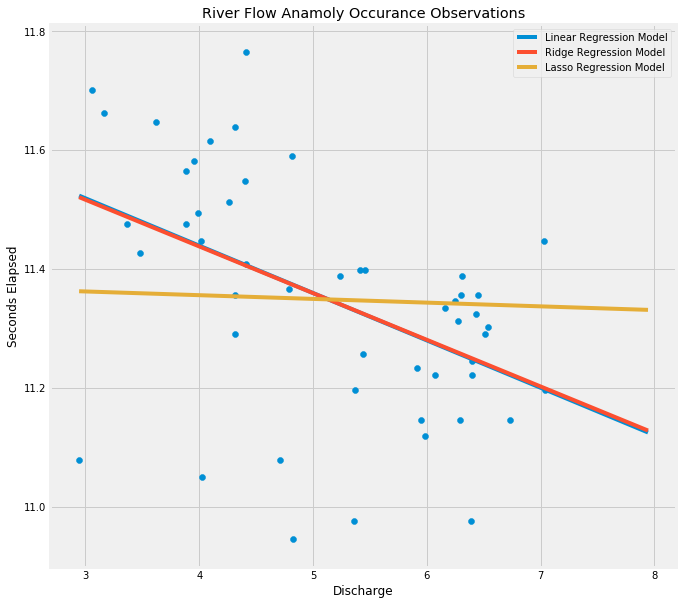

In [98]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(x_range, lin_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Linear Regression Model')
plt.plot(x_range, ridge_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Ridge Regression Model')
plt.plot(x_range, lasso_reg_results.best_estimator_.predict(x_range[:,np.newaxis]), label='Lasso Regression Model')
plt.title('River Flow Anamoly Occurance Observations')
plt.xlabel('Discharge')
plt.ylabel('Seconds Elapsed')
plt.legend()
plt.show()